<a href="https://colab.research.google.com/github/debugk/PredictPrice/blob/master/PridictPrice_datetime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import tqdm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as datetime

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
input_dir = "/content/gdrive/My Drive/PredictPrice/Input"

files   = ["COMEX_Copper_train", 
           "COMEX_Gold_train", 
           "COMEX_Palladium_train", 
           "COMEX_Platinum_train", 
           "COMEX_Silver_train", 
           "Indices_DXY Curncy_train",     # 美元指数
           "Indices_NKY Index_train",      # 日经平均指数
           "Indices_SHSZ300 Index_train",  # 沪深300
           "Indices_SPX Index_train",      # 标准普尔
           "Indices_SX5E Index_train",     # 欧元区斯托克 50 指数
           "Indices_UKX Index_train",      # 富时100指数（伦敦）
           "Indices_VIX Index_train",      # 芝加哥期权交易所市场波动率指数 -- 市场恐慌指数
           "LMEAluminium3M_train", 
           "LMECopper3M_train", 
           "LMELead3M_train", 
           "LMENickel3M_train", 
           "LMETin3M_train", 
           "LMEZinc3M_train", 
           "LMEAluminium_OI_train", 
           "LMECopper_OI_train", 
           "LMELead_OI_train", 
           "LMENickel_OI_train", 
           "LMETin_OI_train", 
           "LMEZinc_OI_train",
           "Label_LMEAluminium_train_1d", 
           "Label_LMEAluminium_train_20d", 
           "Label_LMEAluminium_train_60d", 
           "Label_LMECopper_train_1d", 
           "Label_LMECopper_train_20d", 
           "Label_LMECopper_train_60d", 
           "Label_LMELead_train_1d", 
           "Label_LMELead_train_20d", 
           "Label_LMELead_train_60d", 
           "Label_LMENickel_train_1d", 
           "Label_LMENickel_train_20d", 
           "Label_LMENickel_train_60d", 
           "Label_LMETin_train_1d", 
           "Label_LMETin_train_20d", 
           "Label_LMETin_train_60d", 
           "Label_LMEZinc_train_1d", 
           "Label_LMEZinc_train_20d", 
           "Label_LMEZinc_train_60d"]


df_dict = {}

for file_name in files:
    df_dict[file_name] = pd.read_csv("%s/Train/Train_data/%s.csv"%(input_dir, file_name), parse_dates=True,  index_col=1)


# 1. 画图

第一部分：画输入变量分布图

In [0]:
def ShowPrice(dfs, labels, price='Open'):
  f  = plt.figure(figsize=[10,7])
  ax = f.add_subplot(1,1,1)

  for i in range(len(dfs)):
    ax.plot(dfs[i][price], label=labels[i])
  
  ax.legend(loc='best')
  ax.grid(True)
 

In [0]:
def ShowRelativePrice(dfs, labels, price='Open'):
  f  = plt.figure(figsize=[10,7])
  ax = f.add_subplot(1,1,1)

  for i in range(len(dfs)):
    ax.plot(dfs[i][price]/dfs[i][price].min(), label=labels[i])
  
  ax.legend(loc='best')
  ax.grid(True)
 

In [0]:
show_list = ["COMEX_Copper_train", 
           "COMEX_Gold_train", 
           "COMEX_Palladium_train", 
           "COMEX_Platinum_train", 
           "COMEX_Silver_train"]

comex_list = []

for file_name in show_list:
  comex_list += [df_dict[file_name].dropna()]

labels = ['Copper', 'Gold', 'Palladium','Platinum', 'Silver']

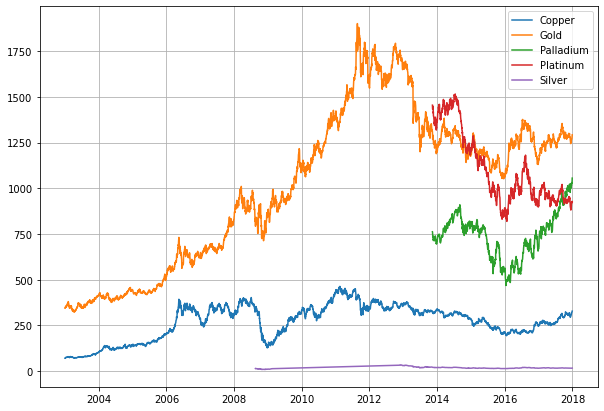

In [0]:
ShowPrice(comex_list, labels)

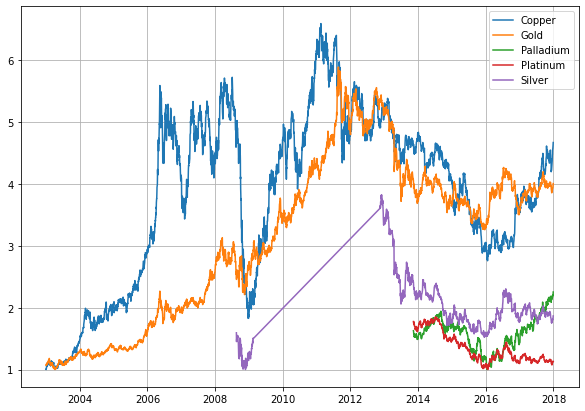

In [0]:
ShowRelativePrice(comex_list, labels)

# 1.1 K 线图

1.1 K 线图

In [21]:
!pip install mpl_finance # 过时了

In [0]:
from matplotlib.pylab import date2num, num2date
import mpl_finance as mpf

# 日期转换, 为了画周六日，，，
# https://matplotlib.org/gallery/ticks_and_spines/date_index_formatter.html
# date2num(datetime.datetime.strptime('2014-01-01','%Y-%m-%d'))

k_gold_data = df_dict['COMEX_Gold_train']['2016-01'].copy()

num_date_list = []
for dates, row in k_gold_data.iterrows():
  num_date_list += [date2num(dates)]

k_gold_data['num_date'] = num_date_list

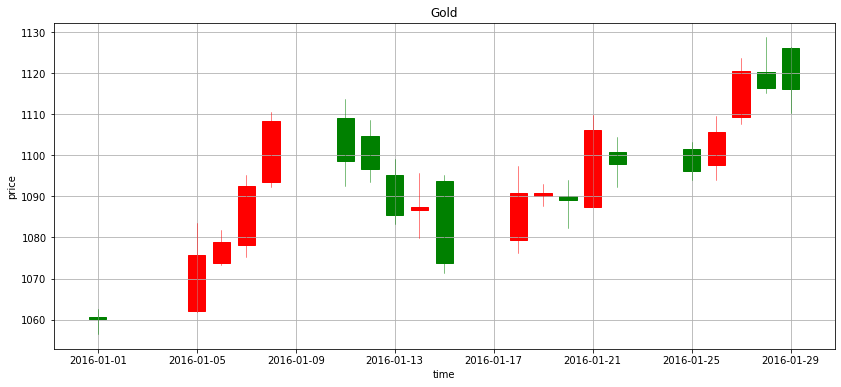

In [50]:
fig = plt.figure(figsize=(14, 6)) #设定画布大小
ax = plt.subplot()

ax.xaxis_date()
plt.title('Gold')
plt.xlabel("time")
plt.ylabel("price")
mpf.candlestick_ohlc(ax, k_gold_data[['num_date', 'Open', 'High', 'Low', 'Close']].values, width=0.7, colorup='r', colordown='green')
plt.grid(True)


In [54]:
datetime.datetime(2014,1,1).strftime("%B %d, %Y")

'January 01, 2014'

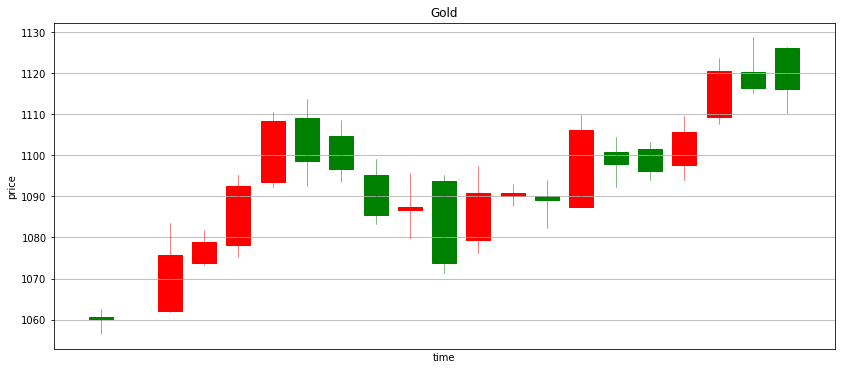

In [79]:
# 去掉周六日

k_gold_data['rank'] = np.array(range(len(k_gold_data)))
#===================================================
def format_date(x, df=k_gold_data['num_date']):
    print("fail", x)
    if x<0 or x>len(df)-1:
        return ''
    print("pass", x)
    return num2date(df[int(x)]).strftime("%B %d, %Y")

#===================================================
from matplotlib.dates import DateFormatter, WeekdayLocator, DayLocator, MONDAY, ticker

fig = plt.figure(figsize=(14, 6)) #设定画布大小
ax = plt.subplot()
monday = WeekdayLocator(MONDAY)
weekFormatter = DateFormatter('%y %b %d')
ax.xaxis.set_major_locator(monday)
ax.xaxis.set_minor_locator(DayLocator())
## ax.xaxis.set_major_formatter(weekFormatter) # 设定工作日为时间轴
g = lambda x: format_date(x, df=k_gold_data['num_date'])
ax.xaxis.set_major_formatter(ticker.FuncFormatter(g)) # 并没有起作用

plt.title('Gold')
plt.xlabel("time")
plt.ylabel("price")

mpf.candlestick_ohlc(ax, k_gold_data[['rank', 'Open', 'High', 'Low', 'Close']].values, width=0.7, colorup='r', colordown='green')
plt.grid(True)

**花了4个小时才发现网上所有教程都是过时的，，，**
新版在这https://github.com/matplotlib/mplfinance， 有机会再折腾吧





# 2. 时间序列切片

第二部分： 时间序列切片

In [0]:
# Pandas 能够直接理解字符串表示的时间
df_dict["COMEX_Copper_train"]['2014-01'] # 选出2014年一月的子集数据

# df_dict["COMEX_Copper_train"]['1/2014'] # 等价操作

,Unnamed: 0,Open,High,Low,Close,Volume,Open.Interest
Unnamed: 0.1,,,,,,,
2014-01-01,6261,337.85,340.80,336.65,339.65,28532.0,113162.0
2014-01-02,6262,NaN,337.25,337.25,NaN,NaN,NaN
2014-01-03,6263,339.85,342.45,337.60,338.15,42675.0,113437.0
2014-01-06,6264,338.50,338.75,334.55,335.50,36142.0,113014.0
2014-01-07,6265,335.05,336.45,333.05,335.95,38062.0,113950.0
2014-01-08,6266,335.95,336.60,334.20,335.95,36077.0,112714.0
2014-01-09,6267,335.65,337.70,333.50,334.25,38932.0,110868.0
2014-01-10,6268,334.25,335.65,328.85,329.90,56655.0,107399.0
2014-01-13,6269,329.50,334.65,328.95,334.15,46978.0,109581.0


In [0]:
# 生成日期范围
# 1. 字符串切片
df_dict["COMEX_Copper_train"].loc['2014-01-15':'2014-01-23']

,Unnamed: 0,Open,High,Low,Close,Volume,Open.Interest
Unnamed: 0.1,,,,,,,
2014-01-15,6271,334.25,335.05,332.05,333.60,29958.0,103970.0
2014-01-16,6272,333.25,336.35,330.80,335.80,47715.0,103700.0
2014-01-17,6273,335.20,336.95,332.85,334.25,38298.0,100931.0
2014-01-20,6274,333.70,336.40,332.65,334.45,30249.0,100150.0
2014-01-21,6275,334.15,335.60,333.35,NaN,12850.0,NaN
2014-01-22,6276,334.15,335.80,331.50,335.10,52675.0,98650.0
2014-01-23,6277,334.60,335.50,332.30,333.70,30058.0,96723.0


In [0]:
# 2. datetime 切片，方便编程
start = datetime.datetime(2014, 1, 15)
end   = start + datetime.timedelta(8) # 间隔8天
print(str(start))
print(str(end))

df_dict["COMEX_Copper_train"].loc[start: end]

2014-01-15 00:00:00
2014-01-23 00:00:00


,Unnamed: 0,Open,High,Low,Close,Volume,Open.Interest
Unnamed: 0.1,,,,,,,
2014-01-15,6271,334.25,335.05,332.05,333.60,29958.0,103970.0
2014-01-16,6272,333.25,336.35,330.80,335.80,47715.0,103700.0
2014-01-17,6273,335.20,336.95,332.85,334.25,38298.0,100931.0
2014-01-20,6274,333.70,336.40,332.65,334.45,30249.0,100150.0
2014-01-21,6275,334.15,335.60,333.35,NaN,12850.0,NaN
2014-01-22,6276,334.15,335.80,331.50,335.10,52675.0,98650.0
2014-01-23,6277,334.60,335.50,332.30,333.70,30058.0,96723.0


In [0]:
# 3. pandas 自己也可以，但是基础还是datetime
pd_start = pd.to_datetime('01/15/2014') # pandas 会自己解析字符串
pd_end   = pd_start + pd.Timedelta('8 days')

print(str(pd_start))
print(str(pd_end))

df_dict["COMEX_Copper_train"].loc[pd_start: pd_end]

2014-01-15 00:00:00
2014-01-23 00:00:00


,Unnamed: 0,Open,High,Low,Close,Volume,Open.Interest
Unnamed: 0.1,,,,,,,
2014-01-15,6271,334.25,335.05,332.05,333.60,29958.0,103970.0
2014-01-16,6272,333.25,336.35,330.80,335.80,47715.0,103700.0
2014-01-17,6273,335.20,336.95,332.85,334.25,38298.0,100931.0
2014-01-20,6274,333.70,336.40,332.65,334.45,30249.0,100150.0
2014-01-21,6275,334.15,335.60,333.35,NaN,12850.0,NaN
2014-01-22,6276,334.15,335.80,331.50,335.10,52675.0,98650.0
2014-01-23,6277,334.60,335.50,332.30,333.70,30058.0,96723.0


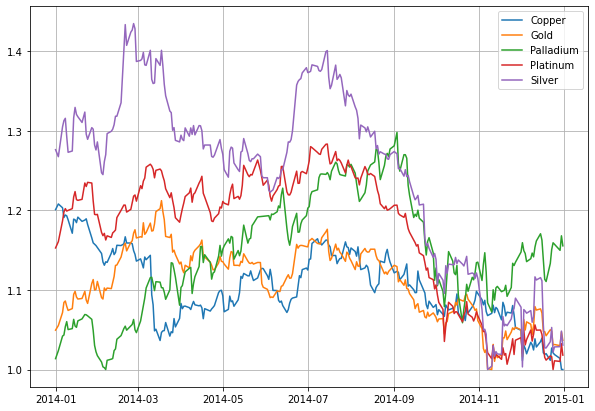

In [0]:
part_comex_list = []

for file_name in show_list:
  part_comex_list += [df_dict[file_name]['2014'].dropna()]

labels = ['Copper', 'Gold', 'Palladium','Platinum', 'Silver']

ShowRelativePrice(part_comex_list, labels)

# 3. 统计量

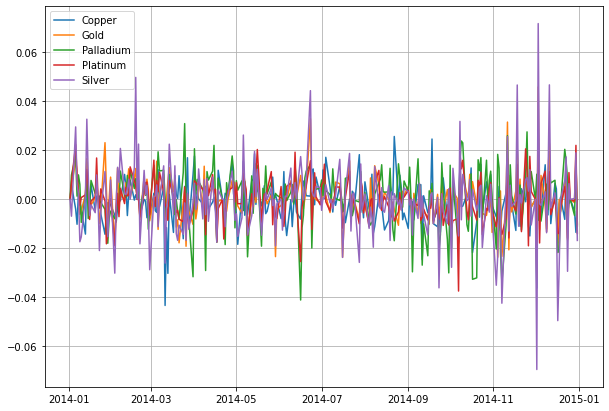

In [0]:
# 每日收益率 Percentage change: pct_change()
part_comex_list = []

for file_name in show_list:
  part_comex_list += [df_dict[file_name]['2014'].pct_change().dropna()]

labels = ['Copper', 'Gold', 'Palladium','Platinum', 'Silver']

ShowPrice(part_comex_list, labels)

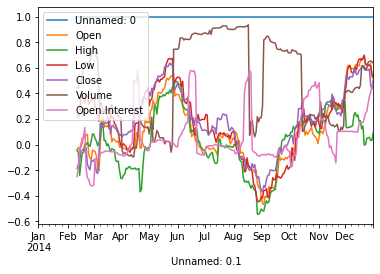

In [0]:
# 金 铜 收益率相关性
gold_pct   = df_dict['COMEX_Gold_train']  ['2014'].pct_change()
copper_pct = df_dict['COMEX_Copper_train']['2014'].pct_change()

# 新版本pandas 已经删了这个函数
# pd.rolling_corr(gold_pct, copper_pct, 30).plot() # 30 天窗口 

gold_pct.rolling(30).corr(copper_pct).plot()

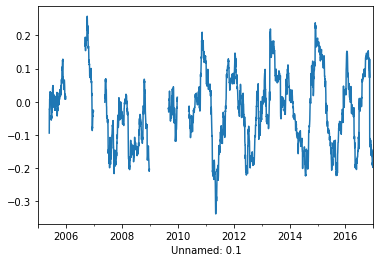

In [0]:
# 金 美元 收益率相关性
gold_pct   = df_dict['COMEX_Gold_train']        ['2005':'2016']['Open'].pct_change()
dollor_pct = df_dict['Indices_DXY Curncy_train']['2005':'2016']['DXY'].pct_change()

gold_pct.rolling(100).corr(dollor_pct).plot()

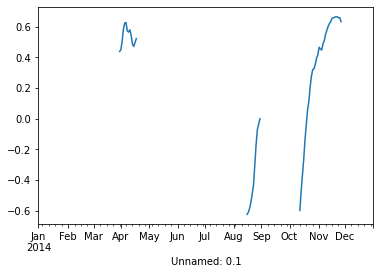

In [0]:
# 金 恐慌 收益率相关性
gold_pct = df_dict['COMEX_Gold_train']        ['2014']['Open']
vix_pct  = df_dict['Indices_VIX Index_train'] ['2014']['VIX']

gold_pct.rolling(30).corr(vix_pct).plot()

In [0]:
df_dict['Indices_VIX Index_train']

,Unnamed: 0,VIX
Unnamed: 0.1,,
2003-01-02,3276,28.62
2003-01-03,3277,25.39
2003-01-06,3278,24.68
2003-01-07,3279,24.91
2003-01-08,3280,25.13
...,...,...
2017-12-22,7047,9.62
2017-12-26,7048,9.90
2017-12-27,7049,10.25


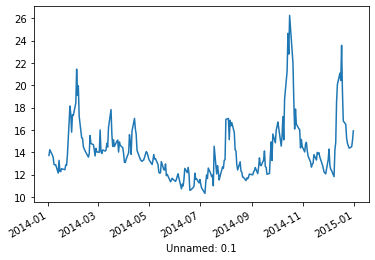

In [0]:
vix_pct.plot()